In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import numpy as np

# Set style for better looking plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [23]:
#TASK 1
try:
    # Fetch the Iris dataset
    iris = fetch_ucirepo(id=53)
    
    # Extract features and targets
    X = iris.data.features
    y = iris.data.targets
    
    # Combine features and targets into a single DataFrame
    df = pd.concat([X, y], axis=1)
    
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!
Dataset shape: (150, 5)


In [24]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Explore the structure of the dataset
print("Dataset information:")
print(df.info())
print("\nData types:")
print(df.dtypes)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Data types:
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


In [26]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [27]:
# Clean the dataset by handling missing values
# Since the Iris dataset is typically clean, we'll demonstrate the process anyway
print("Before cleaning - Shape:", df.shape)
df_cleaned = df.dropna()  # Drop any rows with missing values
print("After cleaning - Shape:", df_cleaned.shape)
print("Number of rows dropped:", df.shape[0] - df_cleaned.shape[0])

# Use the cleaned dataset for further analysis
df = df_cleaned

Before cleaning - Shape: (150, 5)
After cleaning - Shape: (150, 5)
Number of rows dropped: 0


In [28]:
#TASK 2
# Compute basic statistics of numerical columns
print("Basic statistics of numerical columns:")
df.describe()

Basic statistics of numerical columns:


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
# Perform grouping on the categorical column (species) and compute means
print("Mean values for each measurement by species:")
species_means = df.groupby('class').mean()
species_means

Mean values for each measurement by species:


,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [30]:
# Additional statistics by species
print("Additional statistics by species:")
species_stats = df.groupby('class').agg(['mean', 'median', 'std'])
species_stats

Additional statistics by species:


sepal length                  sepal width                   \
                        mean median       std        mean median       std   
class                                                                        
Iris-setosa            5.006    5.0  0.352490       3.418    3.4  0.381024   
Iris-versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
Iris-virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

                petal length                  petal width                   
                        mean median       std        mean median       std  
class                                                                       
Iris-setosa            1.464   1.50  0.173511       0.244    0.2  0.107210  
Iris-versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
Iris-virginica         5.552   5.55  0.551895       2.026    2.0  0.274650

In [31]:
# Identify patterns or interesting findings
print("\nKey Findings:")
print("1. Setosa species has distinctly smaller petal measurements compared to other species.")
print("2. Virginica has the largest mean measurements for both sepals and petals.")
print("3. Versicolor appears to be intermediate between Setosa and Virginica in most measurements.")
print("4. Petal measurements show clearer separation between species than sepal measurements.")


Key Findings:
1. Setosa species has distinctly smaller petal measurements compared to other species.
2. Virginica has the largest mean measurements for both sepals and petals.
3. Versicolor appears to be intermediate between Setosa and Virginica in most measurements.
4. Petal measurements show clearer separation between species than sepal measurements.


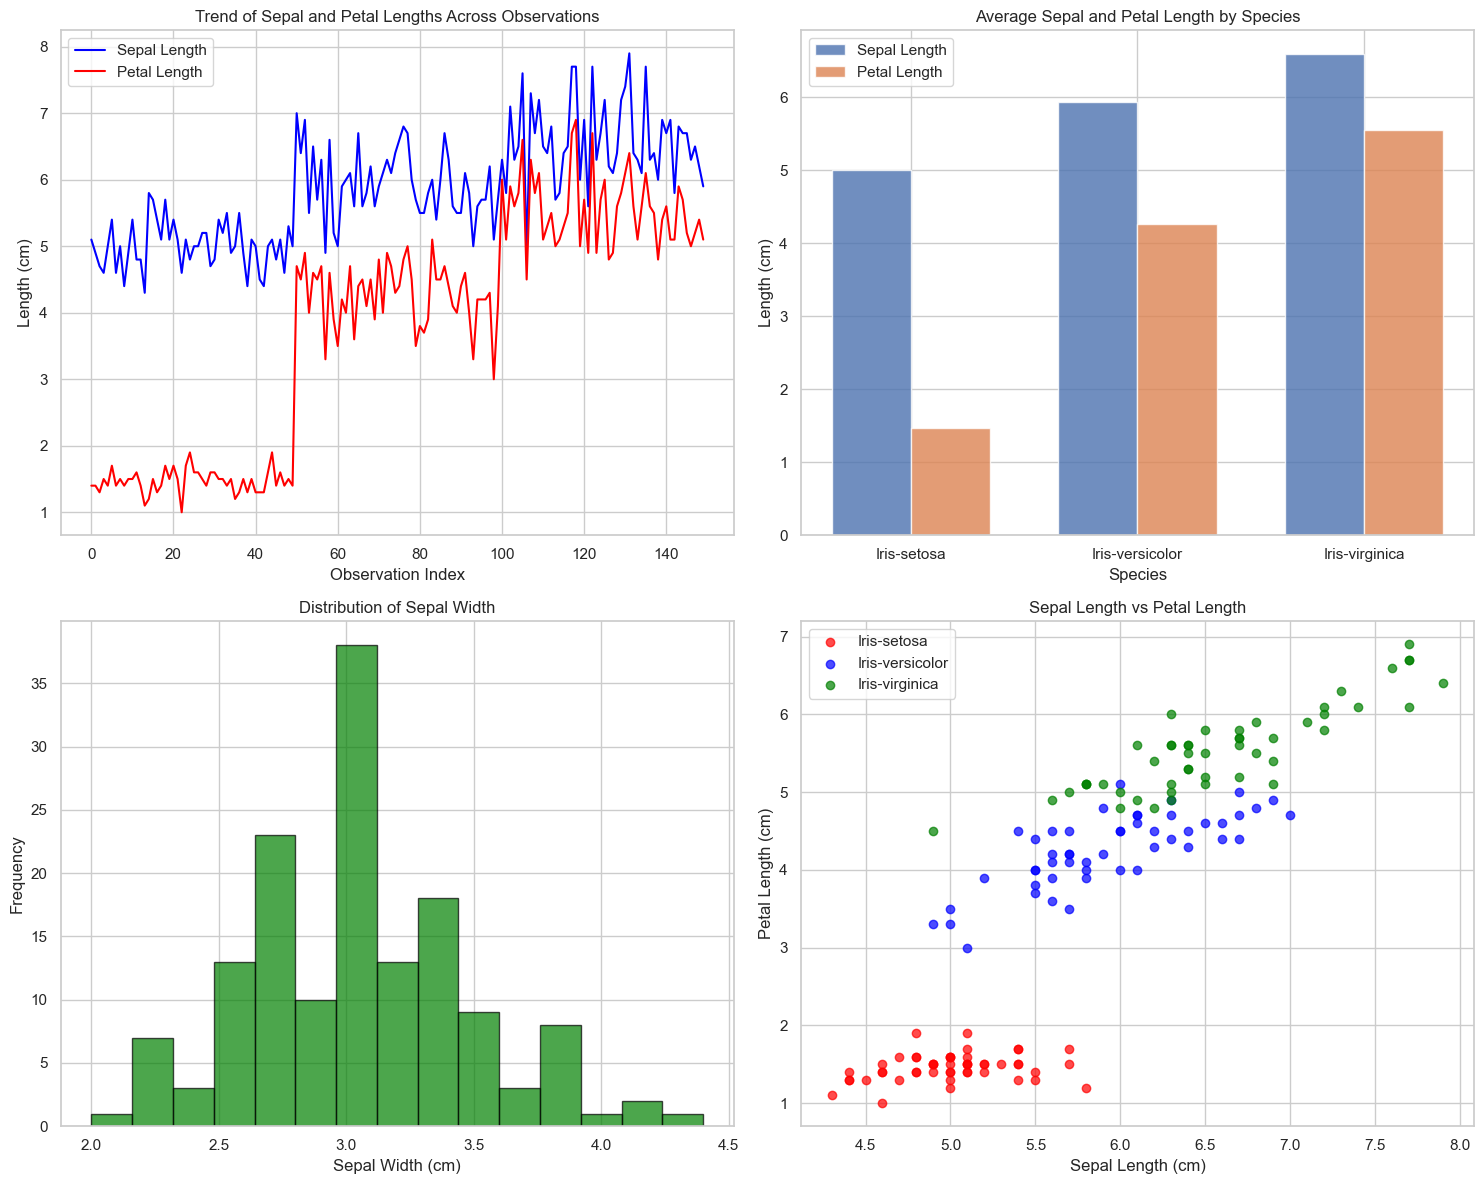

In [32]:
#TASK 3: DATA VISUALIZATION
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Line chart showing trends (using index as proxy for observation order)
axes[0, 0].plot(df.index, df['sepal length'], label='Sepal Length', color='blue')
axes[0, 0].plot(df.index, df['petal length'], label='Petal Length', color='red')
axes[0, 0].set_title('Trend of Sepal and Petal Lengths Across Observations')
axes[0, 0].set_xlabel('Observation Index')
axes[0, 0].set_ylabel('Length (cm)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Bar chart showing comparison of numerical values across categories
species_names = species_means.index
x_pos = np.arange(len(species_names))
width = 0.35

axes[0, 1].bar(x_pos - width/2, species_means['sepal length'], width, label='Sepal Length', alpha=0.8)
axes[0, 1].bar(x_pos + width/2, species_means['petal length'], width, label='Petal Length', alpha=0.8)
axes[0, 1].set_title('Average Sepal and Petal Length by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Length (cm)')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(species_names)
axes[0, 1].legend()

# 3. Histogram of a numerical column
axes[1, 0].hist(df['sepal width'], bins=15, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Sepal Width')
axes[1, 0].set_xlabel('Sepal Width (cm)')
axes[1, 0].set_ylabel('Frequency')

# 4. Scatter plot to visualize relationship between two numerical columns
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
for species in df['class'].unique():
    species_data = df[df['class'] == species]
    axes[1, 1].scatter(species_data['sepal length'], species_data['petal length'], 
                       label=species, alpha=0.7, c=colors[species])
axes[1, 1].set_title('Sepal Length vs Petal Length')
axes[1, 1].set_xlabel('Sepal Length (cm)')
axes[1, 1].set_ylabel('Petal Length (cm)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

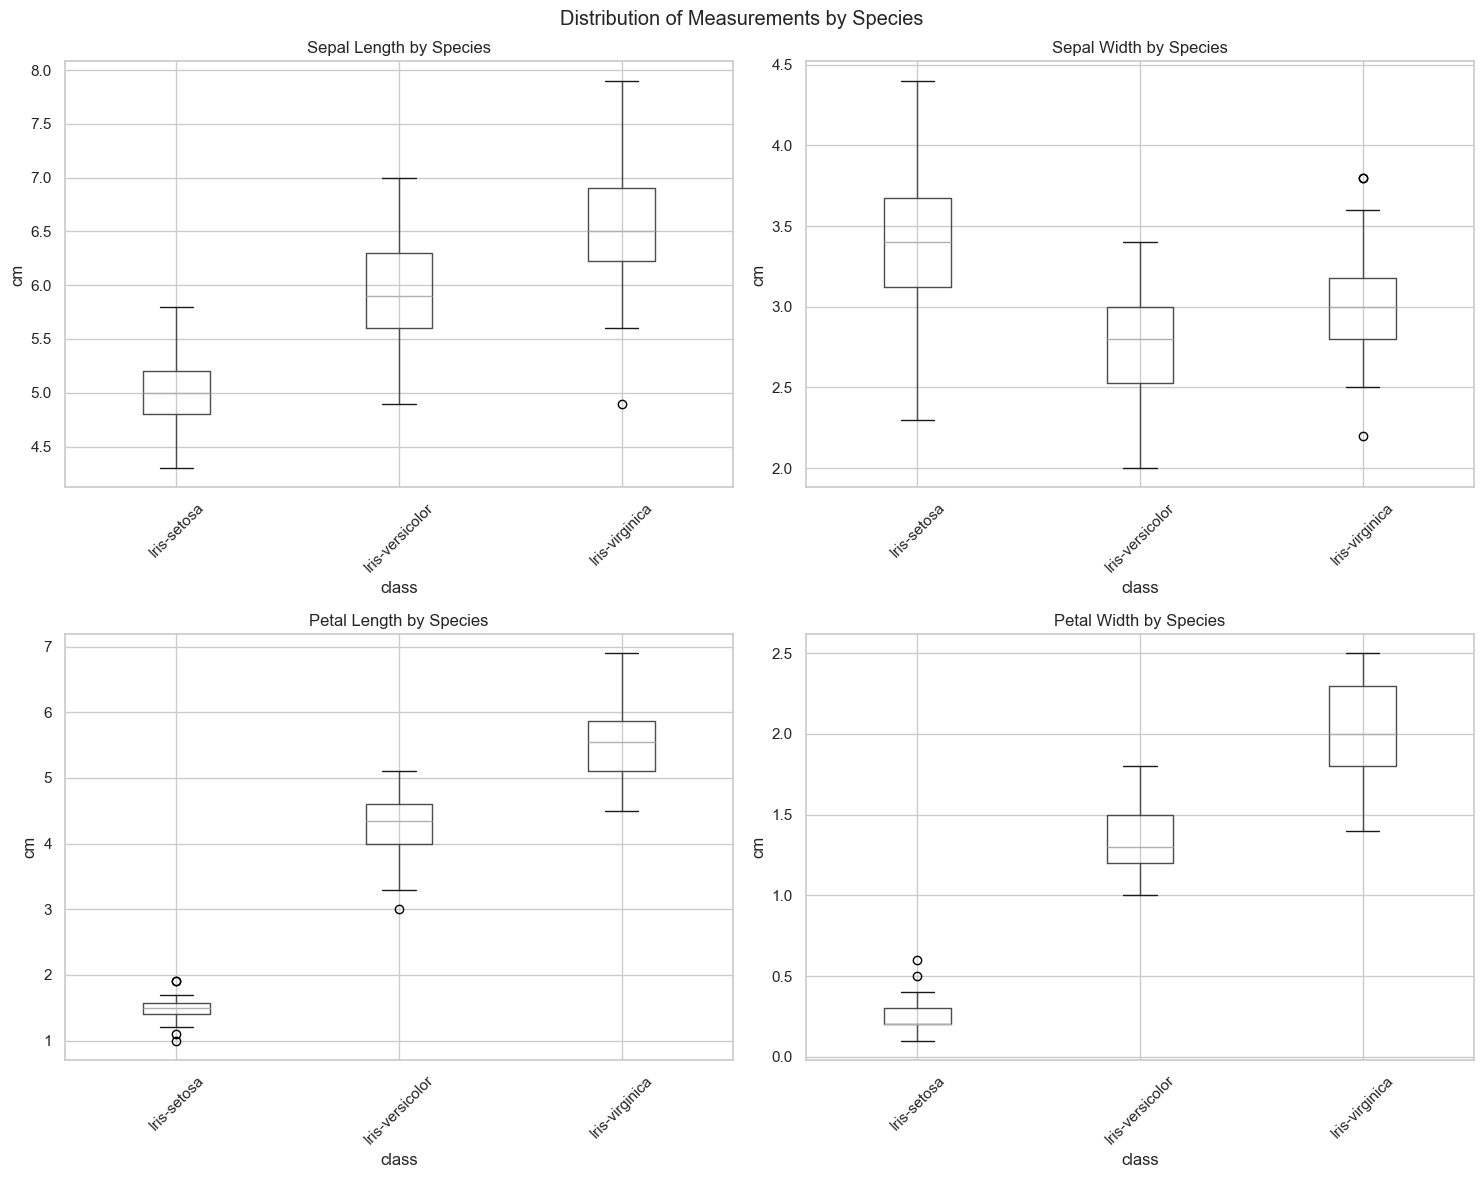

In [33]:
# Additional visualizations to enhance understanding
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Box plots for each measurement by species
measurements = ['sepal length', 'sepal width', 'petal length', 'petal width']
for i, measurement in enumerate(measurements):
    row, col = i // 2, i % 2
    df.boxplot(column=measurement, by='class', ax=axes[row, col])
    axes[row, col].set_title(f'{measurement.title()} by Species')
    axes[row, col].set_ylabel('cm')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of Measurements by Species')
plt.tight_layout()
plt.show()

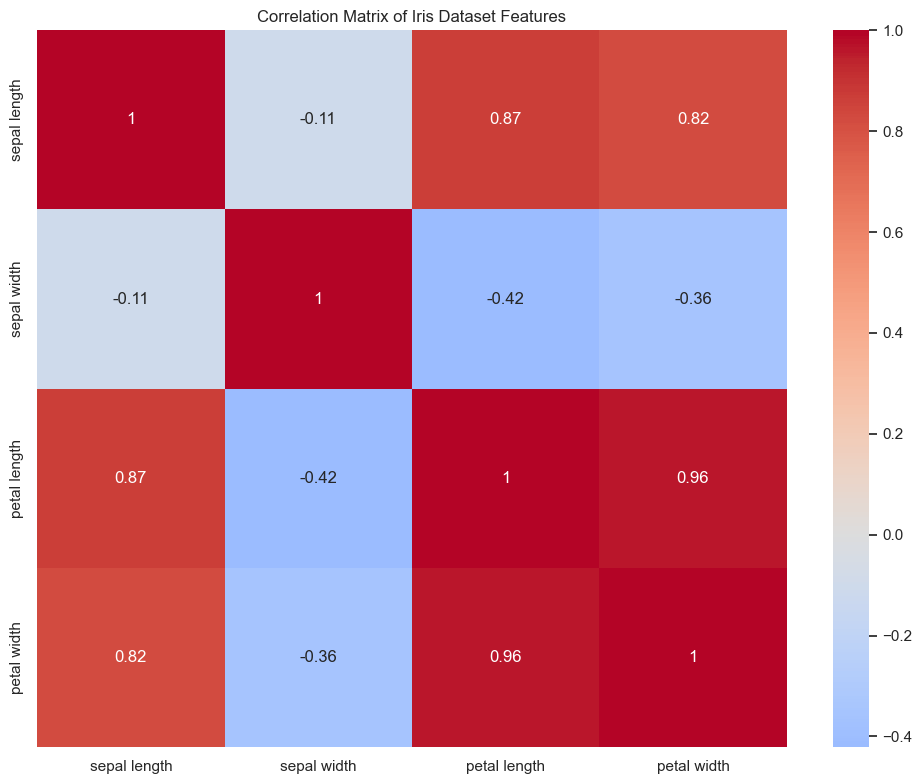

In [34]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.tight_layout()
plt.show()

In [1]:
# SUMMARY OF FINDINGS
def print_summary():
    summary = {
        "Dataset Characteristics": [
            "150 samples with 4 numerical features",
            "Features: sepal length, sepal width, petal length, petal width",
            "Target variable: species (setosa, versicolor, virginica)"
        ],
        "Species Differences": [
            "Setosa has distinctly smaller petals compared to other species",
            "Virginica has the largest measurements on average",
            "Versicolor is intermediate between Setosa and Virginica",
            "Petal measurements show clearer separation between species than sepal measurements"
        ],
        "Correlations": [
            "Petal length and petal width are highly correlated (0.96)",
            "Sepal length and petal length are strongly correlated (0.87)",
            "Sepal width has weak correlations with other features"
        ],
        "Distributions": [
            "Sepal width has the most normal distribution",
            "Setosa is clearly distinguishable from other species based on petal measurements"
        ]
    }
    
    print("="*50)
    print("SUMMARY OF FINDINGS")
    print("="*50)
    
    for category, points in summary.items():
        print(f"\n{category.upper()}:")
        for i, point in enumerate(points, 1):
            print(f"   {i}. {point}")

# Call the function to print the summary
print_summary()

SUMMARY OF FINDINGS

DATASET CHARACTERISTICS:
   1. 150 samples with 4 numerical features
   2. Features: sepal length, sepal width, petal length, petal width
   3. Target variable: species (setosa, versicolor, virginica)

SPECIES DIFFERENCES:
   1. Setosa has distinctly smaller petals compared to other species
   2. Virginica has the largest measurements on average
   3. Versicolor is intermediate between Setosa and Virginica
   4. Petal measurements show clearer separation between species than sepal measurements

CORRELATIONS:
   1. Petal length and petal width are highly correlated (0.96)
   2. Sepal length and petal length are strongly correlated (0.87)
   3. Sepal width has weak correlations with other features

DISTRIBUTIONS:
   1. Sepal width has the most normal distribution
   2. Setosa is clearly distinguishable from other species based on petal measurements
